<a href="https://colab.research.google.com/github/adindasyv/2141720096-pcvk-2023/blob/main/Week10/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADINDA WAHYU LUCHMANSYAHVIRA <BR>
2141720096

### D. TUGAS PRAKTIKUM

#### 1. Import Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Import Library

In [35]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (5,256 kB/s)
debconf: unable to ini

In [36]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

#### 3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan dibawah.


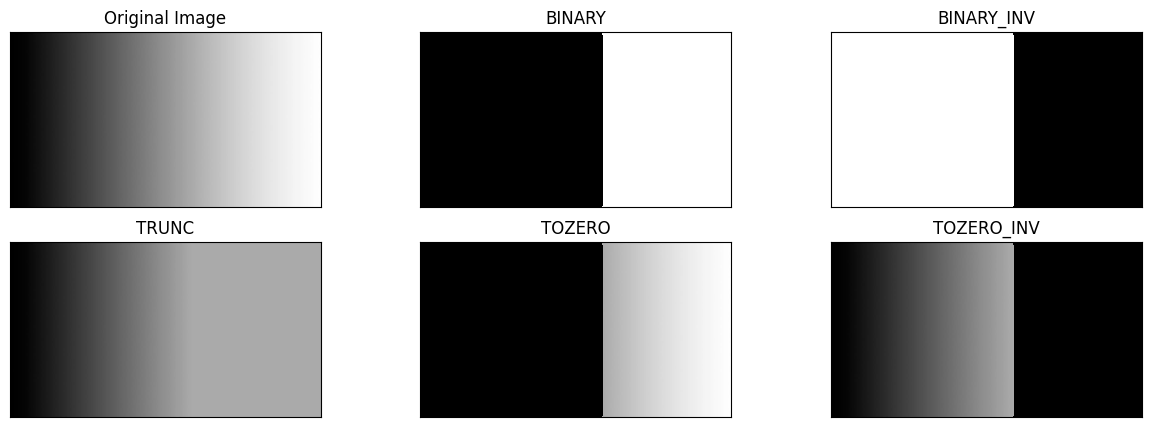

In [6]:
filename = ('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

#### 4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

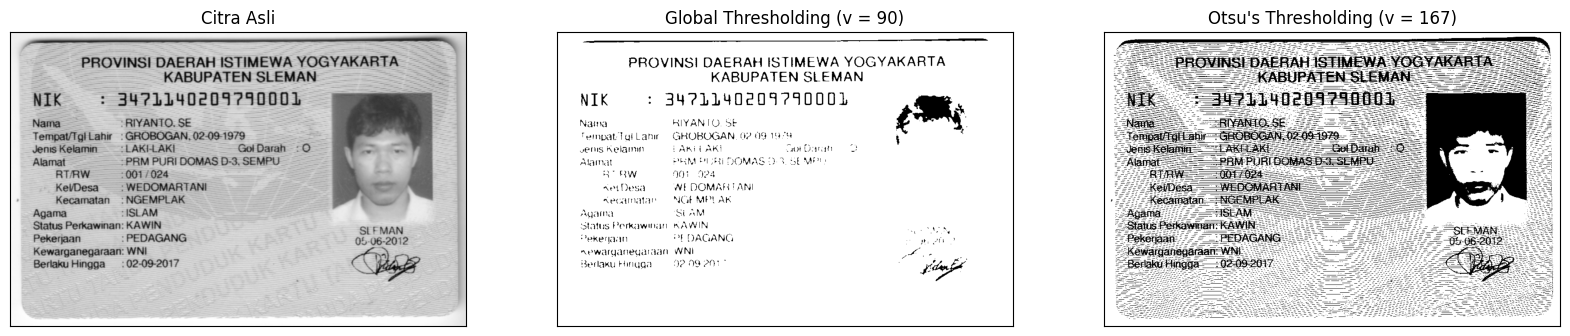

In [19]:
# Load gambar
filename = ('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/ktp pcvk/ktp.png')
img = cv.imread(filename, 0)

# Terapkan Gaussian blur pada gambar
blur = cv.GaussianBlur(img, (5, 5), 0)

# Tentukan fungsi untuk threshold Otsu
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    hist, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]:  # Rentang ini dari 1 hingga 254 (rentang uint8)
        pcb = np.sum(hist[:t])
        pcf = np.sum(hist[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t] * hist[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * hist[t:]) / float(pcf)
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

# Terapkan thresholding Otsu
otsu_binarized, otsu_thresh = otsu(img)

# Tentukan judul untuk gambar hasil thresholding Otsu
otsu_title = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"

# Terapkan thresholding global dengan nilai ambang tetap
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)

# Buat daftar gambar dan judulnya untuk ditampilkan
titles = ['Citra Asli', 'Global Thresholding (v = 90)', otsu_title]
images = [blur, th1, otsu_binarized]

# Tampilkan gambar
plt.figure(figsize=(20, 15))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

#### 5. . Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images. Petunjuk:<br> a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.<br> b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html <br> c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).


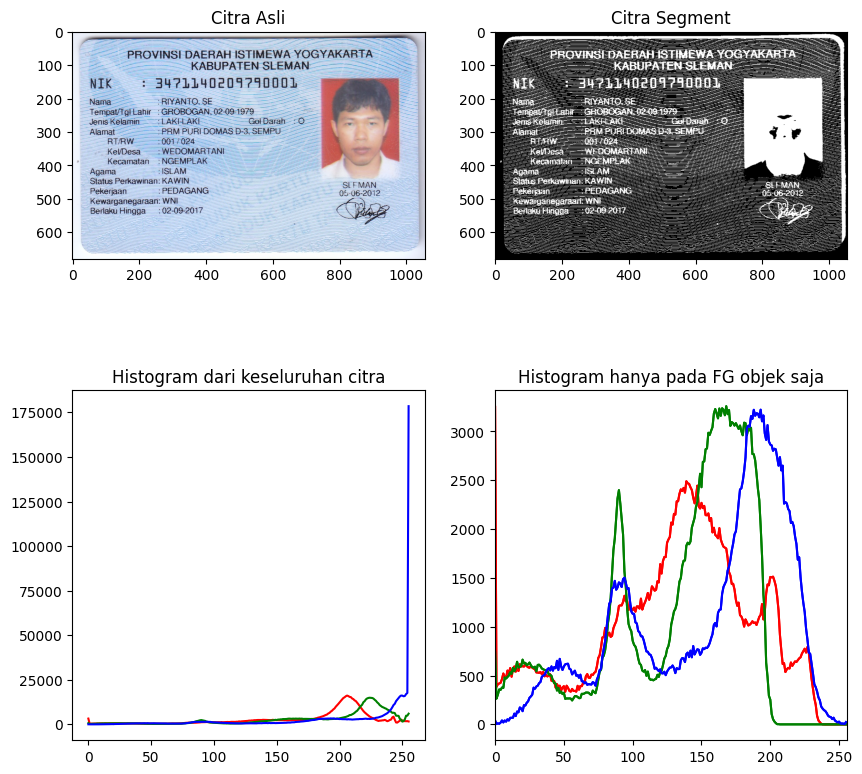

In [18]:
img = ('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/ktp pcvk/ktp.png')
img_l = cv.imread(img)
img_rgb = cv.cvtColor(img_l,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

#### 6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

Text(0.5, 1.0, 'K-Means Segmented Image')

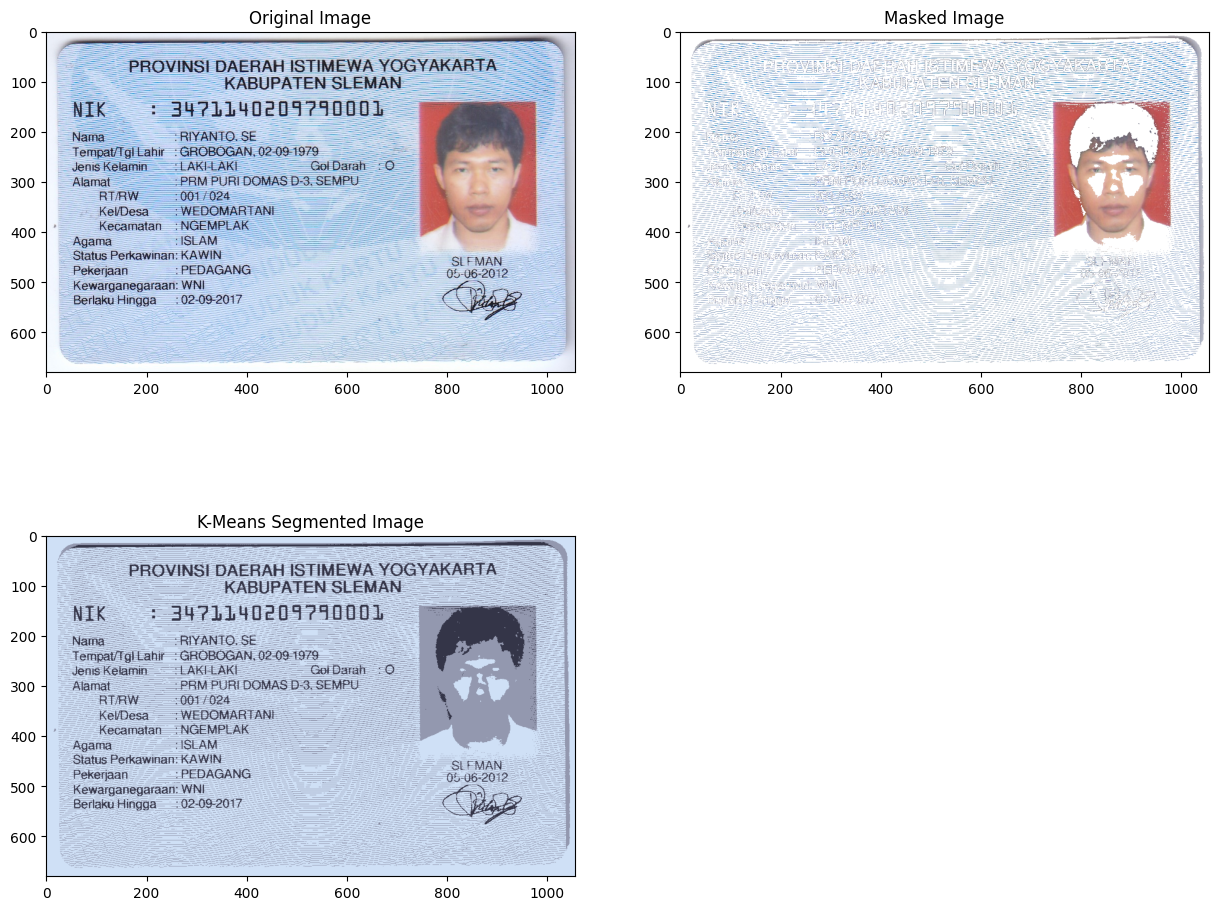

In [17]:
from sklearn.cluster import KMeans
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/ktp pcvk/ktp.png')
img_rgb = cv.cvtColor(img ,cv.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None,
criteria, 10, cv.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img_rgb.shape)

# membuat model masked image
masked_image = np.copy(img_rgb)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 2] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.title('Masked Image')
plt.subplot(2,2,3),plt.imshow(segmented_image)
plt.title('K-Means Segmented Image')

### E. Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.


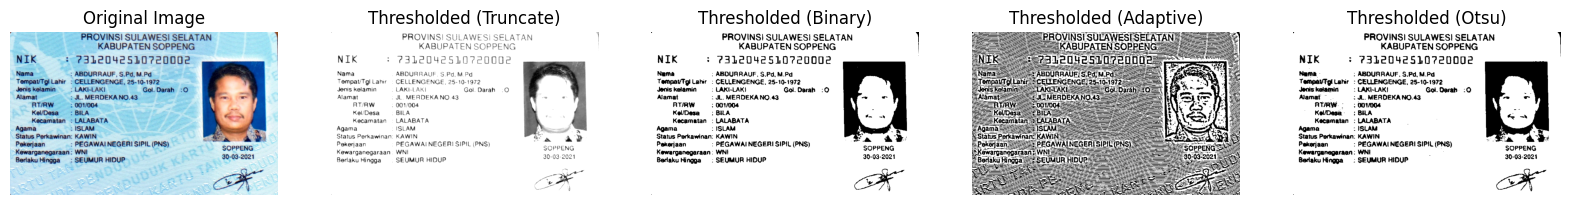

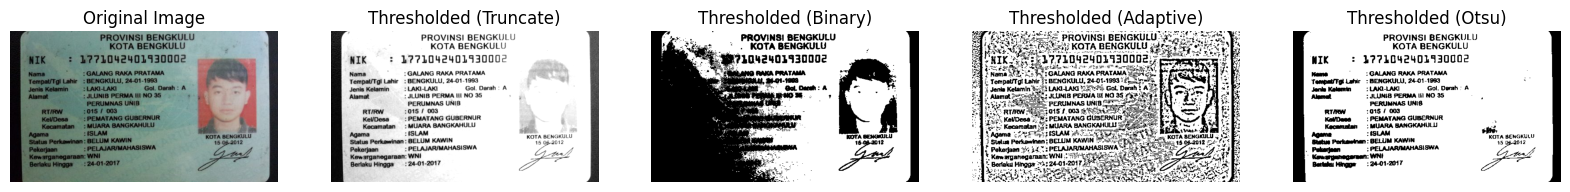

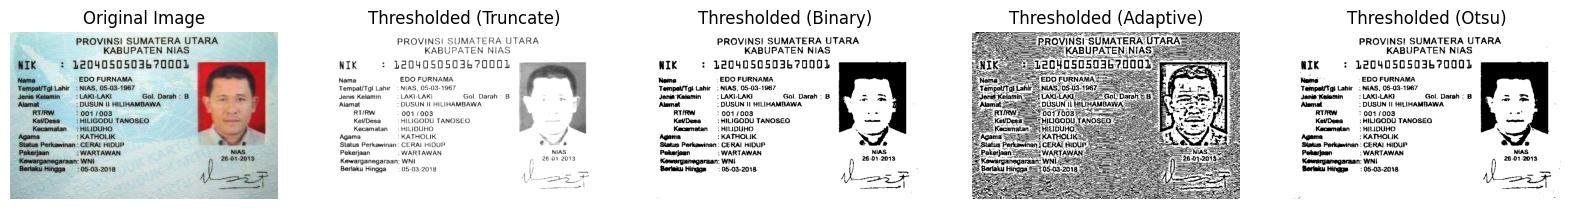

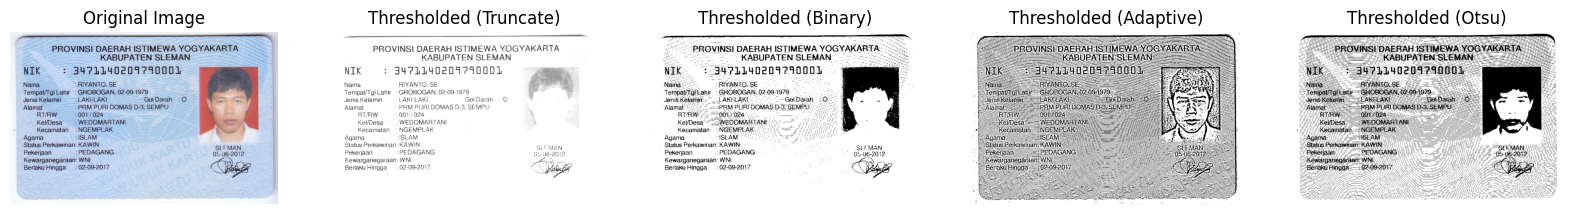

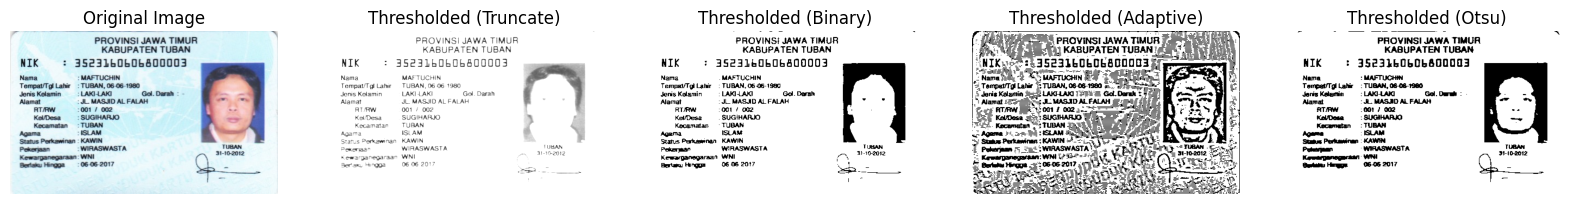

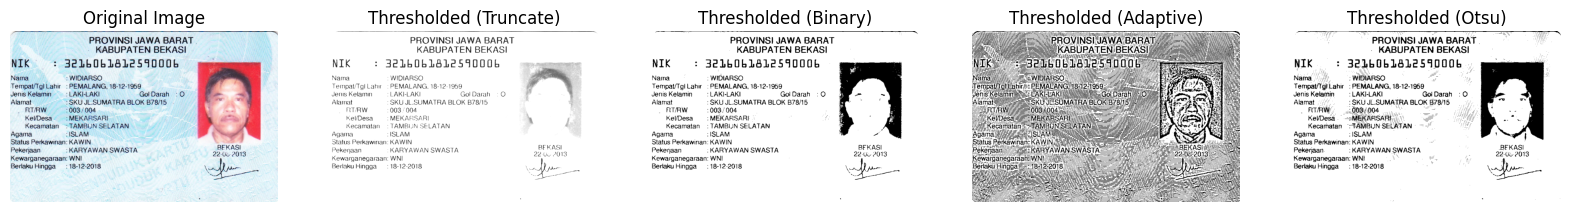

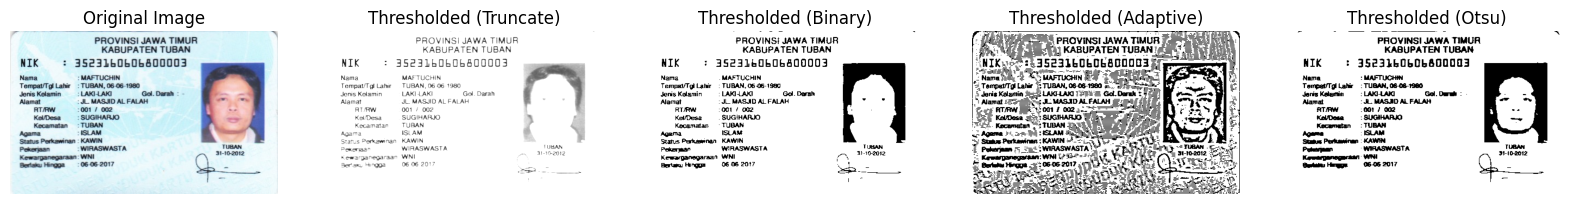

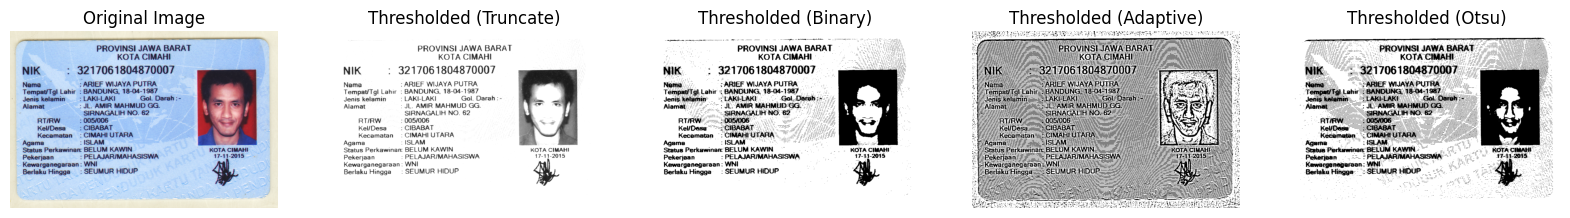

In [30]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing KTP images
folder_path = '/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/ktp pcvk'

# Get a list of image files in the folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Define the threshold value
threshold_value = 128  # You can adjust this threshold value

# Define a list of thresholding methods
threshold_methods = ['Truncate', 'Binary', 'Adaptive', 'Otsu']

# Iterate through KTP images
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY)

    # Create subplots for original image and thresholding results
    plt.figure(figsize=(20, 5))

    # Original Image
    plt.subplot(1, 5, 1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(ktp_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Apply different thresholding methods
    for j, method in enumerate(threshold_methods):
        # Apply thresholding
        if method == 'Truncate':
            _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_TRUNC)
        elif method == 'Binary':
            _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
        elif method == 'Adaptive':
            thresholded_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        elif method == 'Otsu':
            _, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Create a subplot for the thresholded image
        plt.subplot(1, 5, j + 2)
        plt.axis('off')
        plt.imshow(thresholded_image, cmap='gray')
        plt.title(f'Thresholded ({method})')

    plt.show()


#### Mencoba Ekstraksi Teks Menggunakan Pytesseract pada Metode Otsu Treshold

<ipython-input-70-6efc761df0ef>:33: UserWarning: Glyph 12 () missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


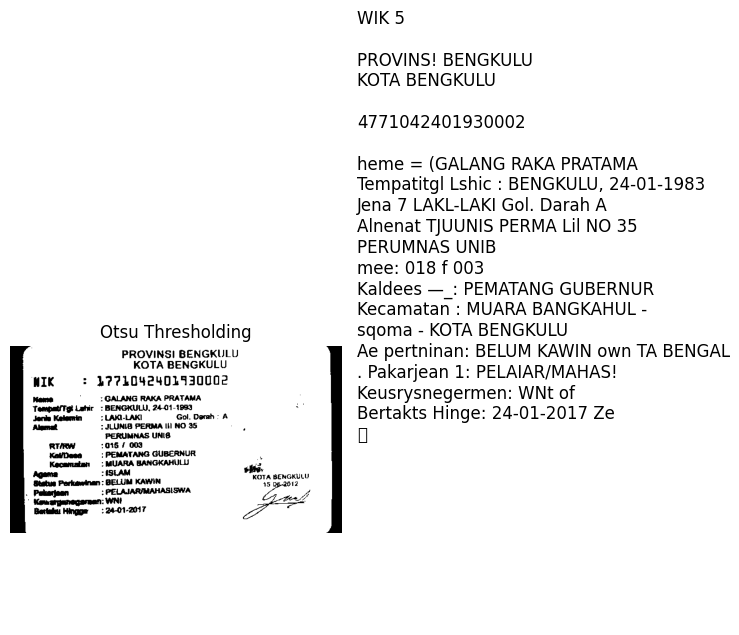

In [70]:
import cv2
import pytesseract
# Load gambar berwarna
image_path = '/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/ktp pcvk/ktp1.png'
color_image = cv2.imread(image_path)

# Ubah gambar ke skala abu-abu
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Terapkan metode Otsu pada gambar skala abu-abu
_, otsu_thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Simpan gambar hasil thresholding Otsu sebagai file gambar terpisah
cv2.imwrite('otsu_thresholded_image.jpg', otsu_thresholded)

# Menggunakan Pytesseract untuk mengekstraksi teks dari gambar hasil thresholding Otsu
extracted_text = pytesseract.image_to_string('otsu_thresholded_image.jpg')

# Tampilkan gambar dan teks hasil ekstraksi
plt.figure(figsize=(8, 6))

# Gambar hasil thresholding Otsu
plt.subplot(1, 2, 1)
plt.imshow(otsu_thresholded, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')

# Teks hasil ekstraksi
plt.subplot(1, 2, 2)
plt.text(0, 0.5, extracted_text, fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

# Tampilkan teks hasil ekstraksi
# print(extracted_text)


#### Melakukan Penerapan Binary Thresholding, Segmentasi K-Means, Konversi Biner, dan Ekstraksi Teks Menggunakan Pytesseract

<ipython-input-65-a6178b876c47>:55: UserWarning: Glyph 12 () missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


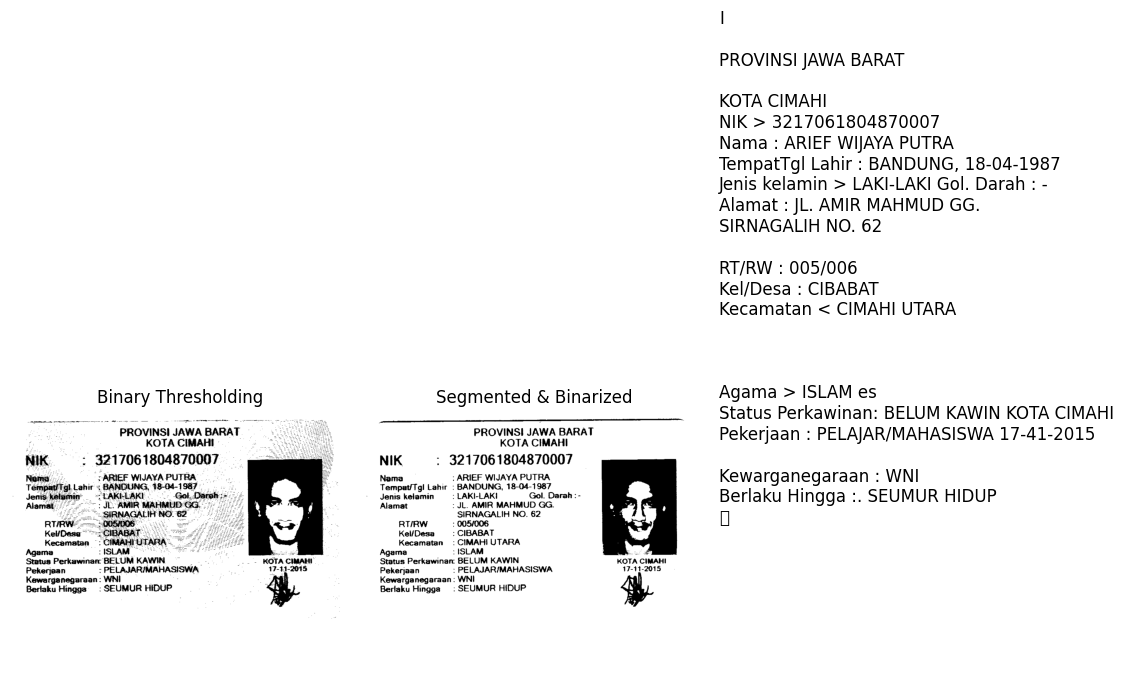

In [65]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Load gambar berwarna
image_path = '/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/ktp pcvk/ktp2.png'
color_image = cv2.imread(image_path)

# Langkah 1: Binary Thresholding
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
_, binary_thresholded = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Langkah 2: Segmentasi K-Means
pixel_values = color_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
k = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(color_image.shape)

# Langkah 3: Konversi Biner
gray_segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
_, binarized_segmented_image = cv2.threshold(gray_segmented_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Simpan gambar hasil Binary Thresholding dan hasil konversi biner sebagai file gambar terpisah
cv2.imwrite('binary_thresholded_image.jpg', binary_thresholded)
cv2.imwrite('binarized_segmented_image.jpg', binarized_segmented_image)

# Langkah 4: Ekstraksi Teks Menggunakan Pytesseract
extracted_text = pytesseract.image_to_string('binarized_segmented_image.jpg')

# Tampilkan gambar dan teks hasil ekstraksi
plt.figure(figsize=(12, 6))

# Gambar hasil Binary Thresholding
plt.subplot(1, 3, 1)
plt.imshow(binary_thresholded, cmap='gray')
plt.title('Binary Thresholding')
plt.axis('off')

# Gambar hasil segmentasi K-Means yang telah dikonversi ke biner
plt.subplot(1, 3, 2)
plt.imshow(binarized_segmented_image, cmap='gray')
plt.title('Segmented & Binarized')
plt.axis('off')

# Teks hasil ekstraksi
plt.subplot(1, 3, 3)
plt.text(0, 0.5, extracted_text, fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()
